<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/DL_byball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/new.csv')
# new.head()

In [237]:
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/t.csv')
# t.head()

In [238]:
t.drop(columns = ['Unnamed: 0'], inplace = True)
t.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1175356,2019-03-23,12,5,12,12,1,0.1,5,12,2019,1,0,0,70,1,0
1,1175356,2019-03-23,12,5,12,12,1,0.2,5,12,2019,1,0,0,70,1,0
2,1175356,2019-03-23,12,5,12,12,1,0.3,5,12,2019,1,0,0,70,1,0
3,1175356,2019-03-23,12,5,12,12,1,0.4,5,12,2019,1,0,0,70,1,0
4,1175356,2019-03-23,12,5,12,12,1,0.5,5,12,2019,1,0,0,70,5,0


In [239]:
new.drop(columns = ['Unnamed: 0'], inplace = True)

In [240]:
new.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,year,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,335982,2008-04-18,5,9,5,9,1,0.1,9,5,2008,1,0,0,222,1,0
1,335982,2008-04-18,5,9,5,9,1,0.2,9,5,2008,1,0,0,222,1,0
2,335982,2008-04-18,5,9,5,9,1,0.3,9,5,2008,1,0,0,222,2,0
3,335982,2008-04-18,5,9,5,9,1,0.4,9,5,2008,1,0,0,222,2,0
4,335982,2008-04-18,5,9,5,9,1,0.5,9,5,2008,1,0,0,222,2,0


In [241]:
# new is the training set and t is the test set

In [242]:
tnew = t.drop(t[(t.over < 15.5) | (t.over >=15.6)].index)
tnew.reset_index(drop = True)
y1test = tnew['total_runs_y']
y2test = tnew['winner']
id_test = tnew['id'].reset_index(drop = True)
id_test = id_test.to_frame().reset_index(drop=True)
tnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
tnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,12,1,15.5,5,12,1,0,0,68,8
1,12,5,12,2,15.5,12,5,1,0,0,67,3
2,9,7,9,1,15.5,7,9,1,0,0,144,1
3,9,7,9,2,15.5,9,7,1,0,0,119,4
4,13,6,13,1,15.5,6,13,1,0,0,139,4


In [243]:
xnew = new.drop(new[(new.over < 15.5) | (new.over >=15.6)].index)
xnew.reset_index(drop = True)
y1train = xnew['total_runs_y']
y2train = xnew['winner']
xnew.drop(columns = ['id', 'date', 'year', 'total_runs_y', 'winner'], inplace = True)
xnew.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,5,9,5,1,15.5,9,5,1,0,0,158,2
1,8,12,12,1,15.5,12,8,0,0,0,168,5
2,8,12,12,2,15.5,8,12,0,0,0,174,3
3,6,11,11,1,15.5,11,6,0,0,0,104,7
4,13,5,13,1,15.5,13,5,0,0,0,110,4


In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [245]:
xnewt = sc.fit_transform(xnew)    #2019 data
tnewt = sc.fit_transform(tnew)    #2008-2020 data

In [246]:
print(xnew.shape)
print(tnew.shape)

(1403, 12)
(116, 12)


# Score Prediction

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

## Training Model

In [248]:
# model = Sequential()
# # model.add(Dense(88, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(50, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(25, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(12, activation = 'relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [249]:
history= model.fit(x=xnewt, y=y1train, epochs=800, 
          validation_data=(tnewt,y1test))

Epoch 1/800
44/44 [==============================] - 1s 7ms/step - loss: 17558.2930 - val_loss: 3217.4563
Epoch 2/800
44/44 [==============================] - 0s 4ms/step - loss: 4280.0845 - val_loss: 3484.2900
Epoch 3/800
44/44 [==============================] - 0s 4ms/step - loss: 3825.1279 - val_loss: 2850.9556
Epoch 4/800
44/44 [==============================] - 0s 4ms/step - loss: 3405.9055 - val_loss: 2264.2935
Epoch 5/800
44/44 [==============================] - 0s 4ms/step - loss: 2780.9424 - val_loss: 1964.2787
Epoch 6/800
44/44 [==============================] - 0s 4ms/step - loss: 2664.5637 - val_loss: 2025.1273
Epoch 7/800
44/44 [==============================] - 0s 4ms/step - loss: 2320.0068 - val_loss: 1683.4882
Epoch 8/800
44/44 [==============================] - 0s 4ms/step - loss: 2257.7832 - val_loss: 2361.9070
Epoch 9/800
44/44 [==============================] - 0s 4ms/step - loss: 1919.2751 - val_loss: 2791.2378
Epoch 10/800
44/44 [==============================] - 

In [250]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


In [251]:
# model.summary()

In [252]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                832       
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 128)               8320      
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               33024     
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 128)              

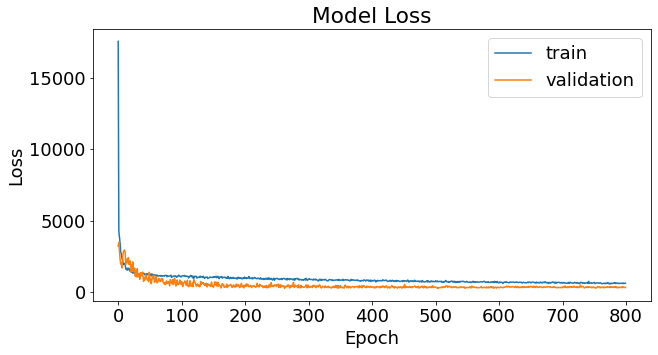

In [253]:
# plt.figure(figsize=(16,8))
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_model_score.png')
plt.show()

In [254]:
y1test = y1test.ravel()

In [255]:
predictions = model.predict(tnewt)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y1test
sample.head(10)

,Predict,Actual
0,104.571457,70
1,115.051010,71
2,187.635132,181
3,149.734650,183
4,178.200226,213
5,163.747803,176
6,182.109131,184
7,171.595474,170
8,157.958862,147
9,149.156311,150


In [256]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [257]:
custom_accuracy(sample['Actual'] , sample['Predict'],12)

50.0

In [258]:
# df.loc[len(df)] = your_array
# results.loc[len(results)] = res2
# df.append(pd.DataFrame(arr).T)
# results = results.append(pd.DataFrame(res2))
# results.append(pd.DataFrame(res3))

In [259]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [260]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)

In [261]:
results.reset_index(drop = True).head()

,Predict,Actual
0,104.571457,70.0
1,115.051010,71.0
2,169.389328,181.0
3,158.002319,183.0
4,181.659912,213.0


In [262]:
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

54.166666666666664


In [263]:
 # results.info()

In [264]:
# results['Actual']

## Test Data set (2021)

In [265]:
tests = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/CSV/testset.csv')
# tests.head()
tests.drop(columns = ['Unnamed: 0'], inplace = True)
tests.head()

,id,date,team1,team2,toss_winner,winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,total_runs_y,cum_total,cum_wicket
0,1254058,2021-04-09,12,5,5,5,1,0.1,12,5,1,0,0,159,2,0
1,1254058,2021-04-09,12,5,5,5,1,0.2,12,5,1,0,0,159,2,0
2,1254058,2021-04-09,12,5,5,5,1,0.3,12,5,1,0,0,159,2,0
3,1254058,2021-04-09,12,5,5,5,1,0.4,12,5,1,0,0,159,4,0
4,1254058,2021-04-09,12,5,5,5,1,0.5,12,5,1,0,0,159,4,0


In [266]:
sets = tests.drop(tests[(tests.over <= 11.0) | (tests.over >=16.0)].index)
sets.reset_index(drop = True)
yt1 = sets['total_runs_y']
yt2 = sets['winner']
tt_2021 = tests['id'].reset_index(drop = True)
tt_2021 = tt_2021.to_frame().reset_index(drop = True)
sets.drop(columns = ['id', 'date', 'total_runs_y', 'winner'], inplace = True)
sets.reset_index(drop=True).head()

,team1,team2,toss_winner,inning,over,batting_team,bowling_team,field,D/L,eliminator?,cum_total,cum_wicket
0,12,5,5,1,11.1,12,5,1,0,0,95,2
1,12,5,5,1,11.2,12,5,1,0,0,95,2
2,12,5,5,1,11.3,12,5,1,0,0,96,2
3,12,5,5,1,11.4,12,5,1,0,0,96,2
4,12,5,5,1,11.5,12,5,1,0,0,97,2


In [267]:
sets.shape

(1297, 12)

In [268]:
yt1 = yt1.ravel()

In [269]:
xs = sc.fit_transform(sets)

In [270]:
predictions = model.predict(xs)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=yt1
sample.head(10)

,Predict,Actual
0,162.176804,159
1,161.981537,159
2,162.587250,159
3,162.285187,159
4,162.937653,159
5,163.522919,159
6,158.140793,159
7,174.036514,159
8,173.860229,159
9,173.411087,159


In [271]:
ar1 = sample['Actual'].unique()
results = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = sample[sample.Actual == items]
  result = (try2.sum())/try2.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  results = results.append(pd.DataFrame(res))

In [272]:
results.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
results.reset_index(drop = True)
print(custom_accuracy(results['Actual'].ravel(),results['Predict'].ravel(),12))

60.0


# Winner Prediction

In [40]:
model = Sequential()
# model.add(Dense(88, activation = 'relu'))
# model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(14, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [41]:
win_pred = model.fit(x=xnewt, y=y2train, epochs=400, 
          validation_data=(tnewt,y2test))

Epoch 1/400
44/44 [==============================] - 1s 6ms/step - loss: 2.8013 - accuracy: 0.0798 - val_loss: 2.5707 - val_accuracy: 0.1810
Epoch 2/400
44/44 [==============================] - 0s 2ms/step - loss: 2.7162 - accuracy: 0.0905 - val_loss: 2.5478 - val_accuracy: 0.2328
Epoch 3/400
44/44 [==============================] - 0s 3ms/step - loss: 2.6374 - accuracy: 0.1133 - val_loss: 2.5272 - val_accuracy: 0.2414
Epoch 4/400
44/44 [==============================] - 0s 2ms/step - loss: 2.6030 - accuracy: 0.1190 - val_loss: 2.5054 - val_accuracy: 0.2069
Epoch 5/400
44/44 [==============================] - 0s 2ms/step - loss: 2.5995 - accuracy: 0.1219 - val_loss: 2.4874 - val_accuracy: 0.2500
Epoch 6/400
44/44 [==============================] - 0s 3ms/step - loss: 2.5449 - accuracy: 0.1354 - val_loss: 2.4674 - val_accuracy: 0.2500
Epoch 7/400
44/44 [==============================] - 0s 3ms/step - loss: 2.5647 - accuracy: 0.1454 - val_loss: 2.4476 - val_accuracy: 0.2414
Epoch 8/400
4

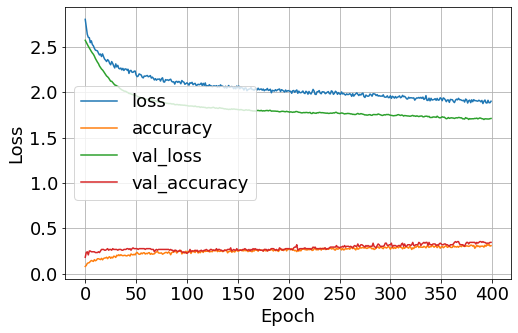

In [42]:
pd.DataFrame(win_pred.history).plot(figsize = (8,5))
# plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 15})
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.grid(True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IPL Score_Analysis/Plots/nn_winner_pred.png')
plt.show()

In [43]:
y2test = y2test.ravel()

In [44]:
predictions = model.predict(tnewt)
class_pred = np.argmax(predictions, axis=1)
class_pred
# sample = pd.DataFrame(predictions,columns=['Predict'])
# sample['Actual']=y2test
# sample.head(10)

array([12,  9,  5,  9, 12, 12,  9, 12, 13, 13,  9,  9, 13, 13, 12,  9, 12,
        9,  8,  5,  5,  5, 12, 13,  5,  5,  9, 12, 13, 13,  5,  5,  5,  8,
        9,  9,  9, 13,  5,  5,  9,  8,  5, 12, 12, 12, 12, 12, 12,  5,  5,
       13, 12,  5,  5, 12,  9,  5,  5, 12, 13,  9, 12,  9,  9, 12, 13,  5,
        8, 12, 12,  5,  5,  8, 12,  9,  9,  5,  9, 12,  5,  5,  9,  9, 13,
       13,  9, 12,  5,  5,  9, 12,  5,  5,  9, 13,  9, 12,  9,  9,  5, 12,
        5,  5, 13,  9, 13, 13, 13, 13,  5,  5, 12, 12, 13, 13])

In [45]:
# proba = predictions.round(2)
# proba

In [46]:
sample = pd.DataFrame(class_pred,columns=['Predict'])
sample['Actual']=y2test
# sample.head()

In [47]:
# frames = [id_test, sample]
# final = pd.concat(frames, axis = 1)
# # final.head()
# ar1 = final['id'].unique()
# winner = pd.DataFrame()
# for items in ar1:
#   # print(items)
#   try2 = final[final.id == items]
#   # try2.drop(columns = 'id', inplace = True)
#   hapi = try2.drop(columns = ['id']).reset_index(drop=True)
#   result = (hapi.sum())/hapi.shape[0]
#   # print(result)
#   res = result.values.reshape(1,2)
#   # print(res)
#   winner = winner.append(pd.DataFrame(res))
  
# winner.rename(columns = {0: 'Predict',
#                           1: 'Actual'
#                           }, inplace = True)
# winner.reset_index(drop = True)

# winner['diff'] = abs(winner['Actual'] - winner['Predict'])
# to = winner.shape[0]
# print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

In [48]:
# final.to_csv('final.csv')

In [49]:
test_pred = model.predict(xs)
class_pred = np.argmax(test_pred, axis=1)
sample = pd.DataFrame(class_pred,columns=['Predict'])
yt2 = yt2.ravel()
sample['Actual']=yt2

In [50]:
frames = [tt_2021, sample]
final = pd.concat(frames, axis = 1)
# final.head()
ar1 = final['id'].unique()
winner = pd.DataFrame()
for items in ar1:
  # print(items)
  try2 = final[final.id == items]
  # try2.drop(columns = 'id', inplace = True)
  hapi = try2.drop(columns = ['id']).reset_index(drop=True)
  result = (hapi.sum())/hapi.shape[0]
  # print(result)
  res = result.values.reshape(1,2)
  # print(res)
  winner = winner.append(pd.DataFrame(res))
  
winner.rename(columns = {0: 'Predict',
                          1: 'Actual'
                          }, inplace = True)
winner.reset_index(drop = True)

winner['diff'] = abs(winner['Actual'] - winner['Predict'])
to = winner.shape[0]
print( ((winner[(winner['diff'])<1].shape[0])/to)*100 )

85.71428571428571


In [51]:
winner.shape

(21, 3)